In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('./rf_dataset.csv')

# Display the first 10 rows of the dataset
df.head(10)

,net_oil_kbpd,bhp_psig,thp_psig,gor_scfperstb
0,1.676654,2200.69,903.06,430.459915
1,2.785943,2194.36,912.05,424.414233
2,2.763932,2194.18,912.92,405.771544
3,4.840264,2179.26,895.52,408.612580
4,6.679636,2165.48,869.13,405.037275
5,6.889282,2160.34,864.20,402.582657
6,8.698378,2143.29,825.92,402.318196
7,10.359365,2130.50,787.64,401.662640
8,10.151365,2123.74,787.50,403.185957
9,11.949402,2115.27,744.14,398.256409


Text(0, 0.5, 'GOR, scf/stb')

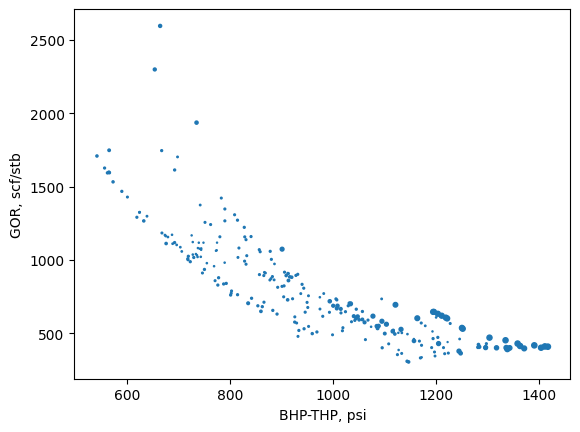

In [3]:
# Plot gor vs BHP-THP
gor = df['gor_scfperstb']
deltabhpthp = df['bhp_psig'] - df['thp_psig']
oilrate = df['net_oil_kbpd']
plt.scatter(deltabhpthp, gor, s=oilrate)
plt.xlabel("BHP-THP, psi")
plt.ylabel("GOR, scf/stb")

In [4]:
# Split the dataset into training and testing data
X = df.drop(['gor_scfperstb'], axis=1)
y = df['gor_scfperstb']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
# To train the model with the feature names, use 'rf.fit(X_train, y_train)'
rf.fit(X_train.values, y_train.values)
score = rf.score(X_test.values, y_test.values)
print("Score:", score)

# Make predictions on the testing data
y_pred = rf.predict(X_test.values)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("I don't know what this MSE means exactly but whatever")

Score: 0.9453178545273571
Mean Squared Error: 10300.832582738993
I don't know what this MSE means exactly but whatever


In [5]:
# Get user input
feature1 = float(input('Enter the value for Net Oil (kbpd): '))
# feature = float(input('Enter the value for Choke Opening (%): '))
feature2 = float(input('Enter the value for BHP (psig): '))
feature3 = float(input('Enter the value for THP (psig): '))

# Make a prediction using the trained model
input_data = np.array([[feature1, feature2, feature3]])
prediction = rf.predict(input_data)[0]

# Print the prediction
print('The predicted target variable is:', prediction)

Enter the value for Net Oil (kbpd): 1
Enter the value for BHP (psig): 1400
Enter the value for THP (psig): 600
The predicted target variable is: 914.2506696790009
